In [1]:
import numpy as np
import pandas as pd
import wandb
import seaborn as sns
import matplotlib.pyplot as plt


def get_title(experiment, dataset):
    if 'grammar' in experiment:
        exp = 'Grammar'
    elif 'uniform' in experiment:
        exp = 'Uniform'
    else:
        experiment.replace('results_', '')
        exp = experiment
    return exp, dataset


class Results():
    def __init__(self, columns):
        num_seeds = 15
        self.result_dict = {}
        for target in ['num_states_to_perfect_fit_test', 'time to perfect fit', 'num simulation to perfect fit']:
            self.result_dict[target] = {}
            self.result_dict[target]['results_grammar_1_Normal'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_uniform_1_Normal'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_grammar_1_AmEx'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_uniform_1_AmEx'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)

            self.result_dict[target]['results_grammar_2_Normal'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_uniform_2_Normal'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_grammar_2_AmEx'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_uniform_2_AmEx'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)

            self.result_dict[target]['results_nn_1'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_nn_1000'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_nn_15'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_nn_30'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_nn_45'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)
            self.result_dict[target]['results_nn_60'] = pd.DataFrame(0, index=list(range(1, num_seeds + 1, 1)), columns=columns)

        dso = {
            'nguyen_1': {0: 44820, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
            'nguyen_2': {0: 51278, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
            'nguyen_3': {0: 49204, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
            'nguyen_4': {0: 59337, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
            'nguyen_5': {0: 298992, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
            'nguyen_6': {0: 41285, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
            'nguyen_7': {0: 100585, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
            'nguyen_8': {0: 43048, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
            'nguyen_9': {0: 29533, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
            'nguyen_10': {0: 24157, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
            'nguyen_11': {0: 28800, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
            'nguyen_12': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},

        }
        self.result_dict['num simulation to perfect fit']['DSO'] = pd.DataFrame(dso)
        print(self.result_dict['num simulation to perfect fit']['DSO'])

    def fill_results(self, config, summary):
        seed = config['seed']
        data_path = config['data_path']
        engine = config['MCTS_engine']
        prior = config['prior_source']
        dataset = config['data_path'].split('/')[1]
        if len(config['path_to_complete_model']) > 10:
            mcts_steps_training = int(config['experiment_name'].split('__')[7])
        for target in ['num_states_to_perfect_fit_test', 'time to perfect fit', 'num simulation to perfect fit']:
            if target in summary:
                value = summary[target]
            else:
                value = np.nan
            if 'data_grammar_1' in data_path and engine == 'Endgame' and prior == 'grammar':
                self.result_dict[target]['results_grammar_1_AmEx'].loc[seed, dataset] = value
            elif 'data_grammar_1' in data_path and engine == 'Normal' and prior == 'grammar':
                self.result_dict[target]['results_grammar_1_Normal'].loc[seed, dataset] = value
            elif 'data_grammar_1' in data_path and engine == 'Endgame' and prior == 'uniform':
                self.result_dict[target]['results_uniform_1_AmEx'].loc[seed, dataset] = value
            elif 'data_grammar_1' in data_path and engine == 'Normal' and prior == 'uniform':
                self.result_dict[target]['results_uniform_1_Normal'].loc[seed, dataset] = value

            elif 'data_grammar_2' in data_path and engine == 'Endgame' and prior == 'grammar':
                self.result_dict[target]['results_grammar_2_AmEx'].loc[seed, dataset] = value
            elif 'data_grammar_2' in data_path and engine == 'Normal' and prior == 'grammar':
                self.result_dict[target]['results_grammar_2_Normal'].loc[seed, dataset] = value
            elif 'data_grammar_2' in data_path and engine == 'Endgame' and prior == 'uniform':
                self.result_dict[target]['results_uniform_2_AmEx'].loc[seed, dataset] = value
            elif 'data_grammar_2' in data_path and engine == 'Normal' and prior == 'uniform':
                self.result_dict[target]['results_uniform_2_Normal'].loc[seed, dataset] = value

            elif engine == 'Endgame' and prior == 'neural_net' and mcts_steps_training == 1:
                self.result_dict[target]['results_nn_1'].loc[seed, dataset] = value
            elif engine == 'Endgame' and prior == 'neural_net' and mcts_steps_training == 1000:
                self.result_dict[target]['results_nn_1000'].loc[seed, dataset] = value
            elif engine == 'Endgame' and prior == 'neural_net' and mcts_steps_training == 15:
                self.result_dict[target]['results_nn_15'].loc[seed, dataset] = value
            elif engine == 'Endgame' and prior == 'neural_net' and mcts_steps_training == 30:
                self.result_dict[target]['results_nn_30'].loc[seed, dataset] = value
            elif engine == 'Endgame' and prior == 'neural_net' and mcts_steps_training == 45:
                self.result_dict[target]['results_nn_45'].loc[seed, dataset] = value
            elif engine == 'Endgame' and prior == 'neural_net' and mcts_steps_training == 60:
                self.result_dict[target]['results_nn_60'].loc[seed, dataset] = value


columns_nguyen = [f"nguyen_{i}" for i in range(1, 13, 1)]
columns_self = [f"self_{i}" for i in range(0, 10, 1)]
columns = columns_nguyen + columns_self
results_obj = Results(columns)
api = wandb.Api()
entity, project = "wwjbrugger", "test_neural_guided_symbolic_regression_13_03"
# Example: January 1st, 2024

# created_at (str): ISO timestamp when the run was started
runs = api.runs(entity + "/" + project, )

summary_list, config_list, name_list = [], [], []

for run in runs:
    # .summary contains output keys/values for
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files
    result_dict = run.summary._json_dict
    try:
        summary_dict = run.summary._json_dict
        config_dict = {k: v for k, v in run.config.items() if not k.startswith("_")}
        results_obj.fill_results(config_dict, summary_dict)
    except Exception as e:
        pass  # print(f"{e} their is a problem with {run.name} ")

print('end')

print('end')

   nguyen_1  nguyen_2  nguyen_3  nguyen_4  nguyen_5  nguyen_6  nguyen_7  \
0     44820     51278     49204     59337    298992     41285    100585   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   
7         0         0         0         0         0         0         0   
8         0         0         0         0         0         0         0   
9         0         0         0         0         0         0         0   

   nguyen_8  nguyen_9  nguyen_10  nguyen_11  nguyen_12  
0     43048     29533      24157      28800          0  
1         0         0          0          0          0  
2  

In [7]:
experiments = ['results_grammar_1_AmEx',
               'results_uniform_1_AmEx',
               #'results_nn_1',
               'results_nn_1000',
               'DSO'
               #'results_nn_15',
               #'results_nn_30',
               # 'results_nn_45',
               # 'results_nn_60'
               ]
columns_to_show = [
    'nguyen_1', 'nguyen_2', 'nguyen_3', 'nguyen_4', 'nguyen_5', 'nguyen_6',
    'nguyen_7', 'nguyen_8', 'nguyen_9', 'nguyen_10', 'nguyen_11',
    'nguyen_12',
    #'self_0', 'self_1', 'self_2', 'self_3', 'self_4', 'self_5',
    #'self_6', 'self_7', 'self_8', 'self_9'
]

columns_plot = ['Grammar', 'Uniform', 'EquationFinder\n (no dataset)', 'EquationFinder\n (no equation)', 'EquationFinder', 'DSO']

equations = {
    'nguyen_1': '$x^3 + x^2 + x $',
    'nguyen_2': '$x^4$ \n +$ x^3 + x^2 + x $',
    'nguyen_3': '$x^5 + x^4$ \n +$ x^3 + x^2 + x $',
    'nguyen_4': '$x^6 + x^5 + x^4$ \n + $x^3 + x^2 + x $',
    'nguyen_5': '$\sin (x_0^2) $\n$ + \cos(x_0) -1  $',
    'nguyen_6': '$\sin (x_0)$ \n+  $\sin (x_0 + x_0^2)$',
    'nguyen_7': '$\log (x_0 + 1)$ \n+ $\log (x_0^2 + 1)$',
    'nguyen_8': '$\sqrt{x_0}$',
    'nguyen_9': '$\sin(x_0) + sin(x_1^2)$',
    'nguyen_10': '$2 \cdot sin (x_0) $\n$ \cdot cos(x_1)$',
    'nguyen_11': '$x_0^{x_1}$',
    'nguyen_12': '$x_0^4 - x_0^3$ \n $+ 0.5 \cdot x_1^2 - x_1$',
}

/tmp/ipykernel_23154/3188153721.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col].set_yticklabels(['' for label in y_tick_labels])
/tmp/ipykernel_23154/3188153721.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col].set_yticklabels(['' for label in y_tick_labels])
/tmp/ipykernel_23154/3188153721.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col].set_yticklabels(['' for label in y_tick_labels])
/tmp/ipykernel_23154/3188153721.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col].set_yticklabels(['' for label in y_tick_labels])
/tmp/ipykernel_23154/3188153721.py:21: UserWarning: set_ticklabels() sho

end


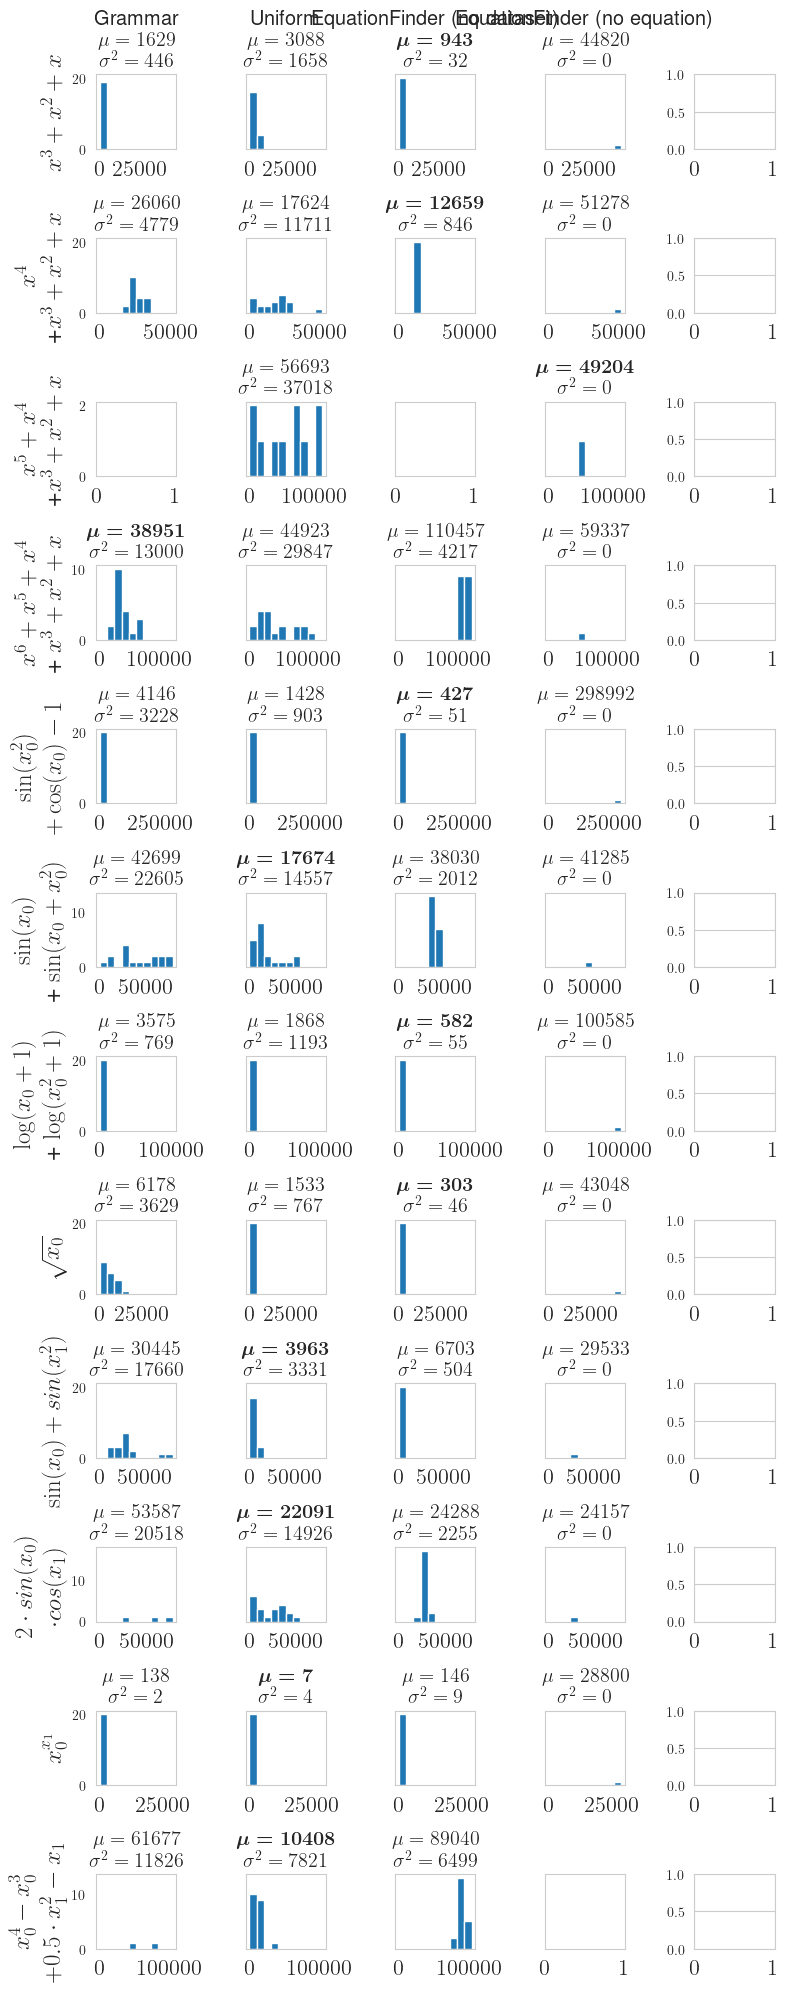

In [6]:
def set_all_plots_in_a_row_to_same_y_values(axs, experiments, row, dataset):
    abs_y_max = 0
    for col, experiment in enumerate(experiments):
        y_min, y_max = axs[row, col].get_ylim()
        if y_max > abs_y_max:
            abs_y_max = y_max
    for col, experiment in enumerate(experiments):
        axs[row, col].set_ylim([0, abs_y_max])
        axs[row, col].grid(visible=False, axis='x', which='both')
        axs[row, col].grid(visible=False, axis='y', which='both')
        if col == 0:
            y_label = ""
            if dataset in equations:
                y_label += f'{equations[dataset]}'
            else:
                y_label += f'{dataset}'
            axs[row, 0].set_ylabel(y_label)

        else:
            y_tick_labels = axs[row, col].get_yticklabels()
            axs[row, col].set_yticklabels(['' for label in y_tick_labels])
            #axs[row, col].get_yaxis().set_visible(False)
            axs[row, col].grid(visible=False, axis='x', which='both')
            axs[row, col].grid(visible=False, axis='y', which='both')
            # axs[row, col].spines['top'].set_visible(False)
            # axs[row, col].spines['right'].set_visible(False)
            # axs[row, col].spines['bottom'].set_visible(False)
            # axs[row, col].spines['left'].set_visible(False)


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    'axes.labelsize': 18,
    'text.latex.preamble': r'\usepackage{amsmath}',
    'axes.titlesize':'x-large',
    'xtick.labelsize' : 16
})

target = 'num simulation to perfect fit'
fig, axs = plt.subplots(len(columns_to_show), len(columns_plot), figsize=[8, 20], sharex=False)
for row, dataset in enumerate(columns_to_show):
    max_value = 0
    min_mean = 100000000000
    min_mean_col = 0
    for col, experiment in enumerate(experiments):
        df = results_obj.result_dict[target][experiment]
        if df.loc[:, dataset].isna().sum() != len(df.loc[:, dataset]) and (df.loc[:, dataset]== 0).sum() != len(df.loc[:, dataset]):
            v = [v for v in df.loc[:, dataset].dropna().tolist() if v != 0]
            if len(v) > 0:
                mean = np.mean(v)
                if max_value < np.max(v):
                    max_value = np.max(v)
                if mean < min_mean:
                    min_mean = mean
                    min_mean_col = col

    for col, experiment in enumerate(experiments):
        df = results_obj.result_dict[target][experiment]
        mean = 0
        std = 0
        if df.loc[:, dataset].isna().sum() != len(df.loc[:, dataset]) and (df.loc[:, dataset]== 0).sum() != len(df.loc[:, dataset]):
            v = [v for v in df.loc[:, dataset].dropna().tolist() if v != 0]
            mean = np.mean(v)
            std = np.std(v)
            if len(v) > 0:
                axs[row, col].hist(
                    x=v,
                    range=(0, max_value),
                    bins=10
                )
                # axs[row, col].scatter(
                #     x=np.zeros(shape=(len(v))),
                #     y=v
                # )

                # axs[row, col].text(x=0.05, y=0.9,
                #                    s=f"\Large \\begin{{align*}} \mu &= {int(np.around(mean, decimals=0))} \\\\ \sigma^2 &= {int(np.around(std, decimals=0))} \end{{align*}}",
                #                    transform=axs[row, col].transAxes)
                # sns.boxplot(data=df,
                #             y=dataset,
                #             ax=axs[row, col]
                #             )

        # exp, data = get_title(experiment, dataset)
        if row == 0:
            if mean > 0:
                if col == min_mean_col:
                    axs[row, col].set_title(  #f'\Large{{{columns_plot[col]}}} \\\\'
                        #f'  \Large{{{columns_plot[col]}}} \\\\ \mu = {int(np.around(mean, decimals=0))} \ \ \ \sigma^2 = {int(np.around(std, decimals=0))} ',
                        f'  {columns_plot[col]} \n $\\boldsymbol{{\mu = {int(np.around(mean, decimals=0))}}}$ \n $\sigma^2 = {int(np.around(std, decimals=0))}$',
                        # f' \\begin{{align*}} &\Large{{{columns_plot[col]}}} \\\\ \mu &= {int(np.around(mean, decimals=0))} \ \ \ \sigma^2 = {int(np.around(std, decimals=0))} \end{{align*}}',
                        #f'not fit: {df.loc[:, dataset].isna().sum()} \n'
                        #f'missing: {(df.loc[:, dataset] == 0).sum()} '
                        #pad=20
                    )
                else:
                    axs[row, col].set_title(  #f'\Large{{{columns_plot[col]}}} \\\\'
                        #f'  \Large{{{columns_plot[col]}}} \\\\ \mu = {int(np.around(mean, decimals=0))} \ \ \ \sigma^2 = {int(np.around(std, decimals=0))} ',
                        f'  {columns_plot[col]} \n $\mu = {int(np.around(mean, decimals=0))}$ \n $\sigma^2 = {int(np.around(std, decimals=0))}$',
                        # f' \\begin{{align*}} &\Large{{{columns_plot[col]}}} \\\\ \mu &= {int(np.around(mean, decimals=0))} \ \ \ \sigma^2 = {int(np.around(std, decimals=0))} \end{{align*}}',
                        #f'not fit: {df.loc[:, dataset].isna().sum()} \n'
                        #f'missing: {(df.loc[:, dataset] == 0).sum()} '
                        #pad=20
                    )

        else:
            if mean > 0:
                if col == min_mean_col:
                    #axs[row, col].set_title(f" \\begin{{align*}} \\boldsymbol{{\mu &= {int(np.around(mean, decimals=0))}}} \ \ \ \ \sigma^2 = {int(np.around(std, decimals=0))} \end{{align*}}")
                    axs[row, col].set_title(f" $\\boldsymbol{{\mu = {int(np.around(mean, decimals=0))}}}$ \n $\sigma^2 = {int(np.around(std, decimals=0))}$")
                else:
                    axs[row, col].set_title(f"  $ \mu = {int(np.around(mean, decimals=0))}$ \n $\sigma^2 = {int(np.around(std, decimals=0))}$")
    set_all_plots_in_a_row_to_same_y_values(axs, experiments, row, dataset)

fig.align_ylabels(axs[:, 0])
fig.tight_layout()
fig.savefig('nguyen_results.pdf')
fig.show()
print('end')


